<a href="https://colab.research.google.com/github/florgaleana/SSF-Oto24FlorMarianGaleanaJuarez/blob/main/SSFT9_FMGJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flor Marián Galeana Juárez

Tarea 9.

*Simulación de Sistemas físicos*

Usando los datos adjuntados, repetir el análisis del siguiente cuaderno en la medida que se pueda analizar (expliquen porque no en su caso o utilicen alguno de los procedimientos de los otros tutoriales). Expliquen que variables eligen de analizar y por qué.

https://scipy-lectures.org/packages/statistics/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
dataframe = pd.read_excel('/content/S1_Dataset.xlsx')
dataframe.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sex,Age,BADS-SF,BADS-SF_Activation,BADS-SF_Avoidance,CES-D,WHOQOL-26_Mean total score,WHOQOL-26_Phisical health,WHOQOL-26_Psychological health,WHOQOL-26_Social relationships,WHOQOL-26_Environment,WHOQOL-26_Overall QOL
0,2,20,37,22,3,1,4.500000,4.833333,4.142857,5.000000,4.375,4.5
1,2,18,33,17,2,2,3.307692,3.166667,3.571429,2.666667,3.250,4.0
2,1,19,30,20,8,2,3.500000,3.833333,3.285714,3.666667,3.250,4.0
3,1,19,23,11,6,3,3.346154,3.500000,3.571429,4.000000,2.750,3.5
4,2,18,35,19,2,3,4.461538,4.500000,4.857143,5.000000,3.875,4.5


*Creación a partir de matrices*

Un dataframe puede verse como un diccionario de "series" unidimensionales, por ejemplo, matrices o listas. Si tenemos 3 numpymatrices:

In [14]:
t = np.linspace(-6,6,15) #Define un conjunto de valores de entrada
x = np.sin(t) #calculamos los valores del seno y coseno de esas entradas
y = np.cos(t) #y los almacenamos en x y y respectivamente

In [15]:
pd.DataFrame({'t':t,'x':x,'y':y})

,t,x,y
0,-6.000000,0.279415,0.960170
1,-5.142857,0.908770,0.417296
2,-4.285714,0.910347,-0.413846
3,-3.428571,0.283056,-0.959103
4,-2.571429,-0.539770,-0.841812
5,-1.714286,-0.989723,-0.142998
6,-0.857143,-0.755975,0.654600
7,0.000000,0.000000,1.000000
8,0.857143,0.755975,0.654600
9,1.714286,0.989723,-0.142998


*Manipulación de datos*

Los DataFrames o marcos de datos son la estructura más importante en pandas. Son parecidos a los de R y es una estructura de datos bidimensional que se utiliza para manejar datos tabulares con múltiples columnas

In [20]:
print(dataframe.shape) #Nuestro dataframe tiene 221 filas y 12 columnas.
print(dataframe.columns) #Podemos ver los nombres de las columnas.
#print(dataframe.index) #Podemos ver los índices de las filas.
print(dataframe['Age']) #Permite visualizar los datos de la columna 'Age'

(221, 12)
Index(['Sex', 'Age', 'BADS-SF', 'BADS-SF_Activation', 'BADS-SF_Avoidance',
       'CES-D', 'WHOQOL-26_Mean total score', 'WHOQOL-26_Phisical health',
       'WHOQOL-26_Psychological health', 'WHOQOL-26_Social relationships',
       'WHOQOL-26_Environment', 'WHOQOL-26_Overall QOL'],
      dtype='object')
0      20
1      18
2      19
3      19
4      18
       ..
216    19
217    18
218    23
219    18
220    21
Name: Age, Length: 221, dtype: int64


In [33]:
#Simple selector
#Calculamos el valor promedio de la columna BADS-SF para todas las líneas
#donde la columna Age sea igual a 30. En este caso no hay ningún valor de 30 en Age.
print("No hay ninguna columna en 'Age' cuyo valor sea 30")
print(dataframe[dataframe['Age'] == 30]['BADS-SF'].mean())

#Si cambiamos el valor a 19, nos arrojará un resultado, ya que sí se encuentra
#este valor en la columna Age:
print("Para 19 años, el valor promedio de BADS-SF es:")
dataframe[dataframe['Age'] == 19]['BADS-SF'].mean()


No hay ninguna columna en 'Age' cuyo valor sea 30
nan
Para 19 años, el valor promedio de BADS-SF es:


22.83695652173913

*Groupby*

Esta función sirve para dividir un marco de datos en valores de variables categóricas.

In [35]:
#Agrupamos los datos según la edad y luego calculamos el promedio de BADS-SF para
#cada grupo de su edad
groupby_age = dataframe.groupby('Age')
for Age, value in groupby_age['BADS-SF']:
  print((Age, value.mean()))


(2, 11.0)
(18, 24.395833333333332)
(19, 22.83695652173913)
(20, 25.45)
(21, 24.47826086956522)
(22, 19.545454545454547)
(23, 18.25)
(24, 17.0)
(25, 26.0)


In [36]:
groupby_age.mean() #Hacemos lo mismo que lo anterior pero no únicamente para la
#columna BDS-SF, sino para todas las columnas.


,Sex,BADS-SF,BADS-SF_Activation,BADS-SF_Avoidance,CES-D,WHOQOL-26_Mean total score,WHOQOL-26_Phisical health,WHOQOL-26_Psychological health,WHOQOL-26_Social relationships,WHOQOL-26_Environment,WHOQOL-26_Overall QOL
Age,,,,,,,,,,,
2,1.000000,11.000000,5.000000,12.000000,30.000000,2.538462,2.000000,3.000000,2.666667,2.750000,1.500000
18,1.520833,24.395833,13.208333,6.812500,16.375000,3.242788,3.166667,3.407738,3.138889,3.195312,3.239583
19,1.478261,22.836957,12.445652,7.608696,14.641304,3.310619,3.114130,3.431677,3.362319,3.330163,3.320652
20,1.725000,25.450000,14.525000,7.075000,14.100000,3.433654,3.366667,3.578571,3.466667,3.378125,3.300000
21,1.608696,24.478261,14.260870,7.782609,15.782609,3.423077,3.181159,3.552795,3.463768,3.532609,3.195652
22,2.000000,19.545455,9.636364,8.090909,17.818182,3.125874,2.909091,3.337662,3.090909,3.193182,2.818182
23,1.750000,18.250000,12.000000,11.750000,24.000000,2.634615,2.250000,2.857143,2.750000,2.687500,2.625000
24,2.000000,17.000000,15.000000,16.000000,14.000000,3.153846,3.000000,2.571429,4.000000,3.625000,2.500000
25,2.000000,26.000000,15.000000,7.000000,9.000000,3.769231,4.333333,3.857143,4.000000,3.375000,3.000000


*Trazado de datos*

Los siguientes códigos, usando la función scatter_matrix para crean un cuadrícula de gráficos.

scatter_matriz genera la matriz del diagrama de dispersión. Luego seleccionamos columnas específicas del dataframe para crear los gráficos de dispersión.

In [40]:
#from pandas import tools
#from pandas.tools import plotting
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='Sex', ylabel='Sex'>,
        <Axes: xlabel='Age', ylabel='Sex'>,
        <Axes: xlabel='BADS-SF', ylabel='Sex'>,
        <Axes: xlabel='BADS-SF_Avoidance', ylabel='Sex'>],
       [<Axes: xlabel='Sex', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='BADS-SF', ylabel='Age'>,
        <Axes: xlabel='BADS-SF_Avoidance', ylabel='Age'>],
       [<Axes: xlabel='Sex', ylabel='BADS-SF'>,
        <Axes: xlabel='Age', ylabel='BADS-SF'>,
        <Axes: xlabel='BADS-SF', ylabel='BADS-SF'>,
        <Axes: xlabel='BADS-SF_Avoidance', ylabel='BADS-SF'>],
       [<Axes: xlabel='Sex', ylabel='BADS-SF_Avoidance'>,
        <Axes: xlabel='Age', ylabel='BADS-SF_Avoidance'>,
        <Axes: xlabel='BADS-SF', ylabel='BADS-SF_Avoidance'>,
        <Axes: xlabel='BADS-SF_Avoidance', ylabel='BADS-SF_Avoidance'>]],
      dtype=object)

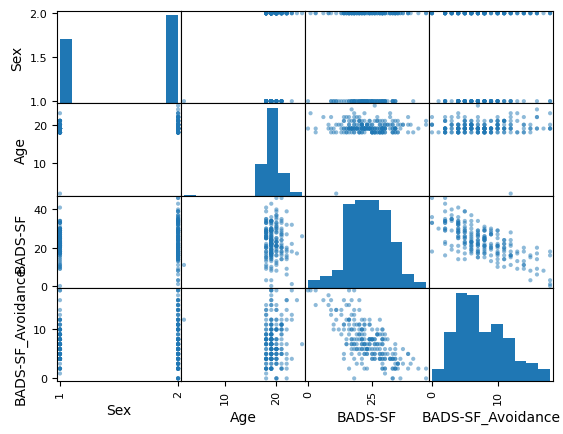

In [42]:
scatter_matrix(dataframe[['Sex', 'Age', 'BADS-SF', 'BADS-SF_Avoidance']])
#

array([[<Axes: xlabel='BADS-SF_Activation', ylabel='BADS-SF_Activation'>,
        <Axes: xlabel='CES-D', ylabel='BADS-SF_Activation'>,
        <Axes: xlabel='WHOQOL-26_Phisical health', ylabel='BADS-SF_Activation'>],
       [<Axes: xlabel='BADS-SF_Activation', ylabel='CES-D'>,
        <Axes: xlabel='CES-D', ylabel='CES-D'>,
        <Axes: xlabel='WHOQOL-26_Phisical health', ylabel='CES-D'>],
       [<Axes: xlabel='BADS-SF_Activation', ylabel='WHOQOL-26_Phisical health'>,
        <Axes: xlabel='CES-D', ylabel='WHOQOL-26_Phisical health'>,
        <Axes: xlabel='WHOQOL-26_Phisical health', ylabel='WHOQOL-26_Phisical health'>]],
      dtype=object)

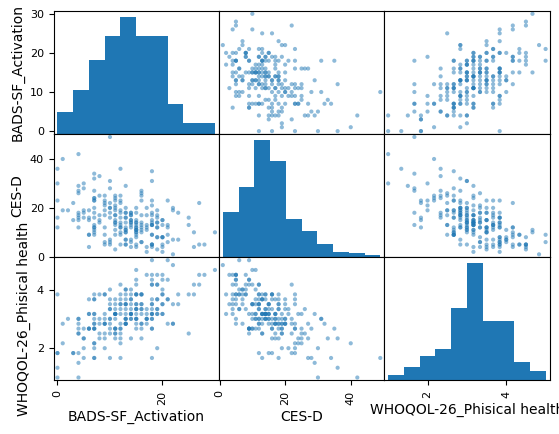

In [43]:
scatter_matrix(dataframe[['BADS-SF_Activation', 'CES-D', 'WHOQOL-26_Phisical health']])


**Prueba de hipótesis: separación de dos grupos**

*Prueba t student*

Prueba del valor de la media de una población.

scipy.stats.ttest_1samp() Comprueba si es probable que la media de la población de los datos sea igual a un valor dado (técnicamente, si las observaciones se extraen de una distribución gaussiana de una media de población dada). Devuelve la estadística T y el valor p.

In [45]:
stats.ttest_1samp(dataframe['Age'], 19)

TtestResult(statistic=3.137915354202126, pvalue=0.0019344293021376806, df=220)

*prueba de diferencias entre poblaciones*

Este tipo de test mide la diferencia de promedios de dos grupos independientes.

Tomaremos dos grupos en los datos, por sexo y comparamos si en este caso la diferencia de edad es significativo.

In [48]:
m_age= dataframe[dataframe['Sex'] == 2]['Age']
h_age = dataframe[dataframe['Sex'] == 1]['Age']
stats.ttest_ind(m_age, h_age)

TtestResult(statistic=3.295459716912351, pvalue=0.0011460911066544907, df=219.0)

*Pruebas Pareadas*

Compararemos a partir de stats.ttest_ind() el promedio de dos grupos independientes. Retomando que CES-D representa las puntuaciones de depresión de los participantes.

In [50]:
stats.ttest_ind(dataframe['Age'], dataframe['CES-D'])


TtestResult(statistic=7.149965431605793, pvalue=3.639972837784499e-12, df=440.0)

Esta línea de código compara la edad promedio de los participantes con sus puntuaciones promedio de depresión para determinar si hay una diferencia estadísticamente significativa entre estas dos variables.

Puede ser interesante ver si hay alguna relación entre la edad y la depresión, este test nos ayuda a determinar si la diferencia observada en las medias de estas dos variables se debe al azar o a un efecto real.

In [51]:
stats.ttest_rel(dataframe['Age'], dataframe['CES-D'])

TtestResult(statistic=7.075381039665911, pvalue=1.966484675094051e-11, df=220)

Usaremos stats.ttest_1samp para comprobar si la media de una muestra es significativamente diferente de la media de una población determinada.

Lo que haremos, será comprobar si la diferencia media entre la edad de un participante y su puntuación de depresión es significativamente distinta de 10:

In [53]:
stats.ttest_1samp(dataframe['Age'] - dataframe['CES-D'], 10)
#

TtestResult(statistic=-10.795009929090275, pvalue=4.471646938800751e-22, df=220)

Las pruebas t suponen errores gaussianos. Podemos utilizar una prueba de rangos con signo de Wilcoxon

In [54]:
stats.wilcoxon(dataframe['Age'], dataframe['CES-D'])

WilcoxonResult(statistic=5047.0, pvalue=1.0586567061854605e-12)

**Modelos lineales**

*Fórmulas para especificar modelos estadísticos en Python*
*Regresión lineal simple*

Esta parte será saltada, ya que en el cuaderno usado en lugar de ocupar la base de datos, genera su propia función para el código para obtener la regresión lineal simple de este.

*Variables categóricas: comparación de grupos o categorías múltiples*

In [4]:
from os import sep
from statsmodels.formula.api import ols
dataframe = pd.read_excel('/content/S1_Dataset.xlsx', na_values='.')
#

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
#Podemos escribir una comparación entre la edad de hombres y mujeres utilizando un modelo lineal:
models = ols('Age ~ C(Sex)', dataframe).fit()
print(models.summary())
#

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     10.86
Date:                Thu, 24 Oct 2024   Prob (F-statistic):            0.00115
Time:                        00:26:08   Log-Likelihood:                -429.69
No. Observations:                 221   AIC:                             863.4
Df Residuals:                     219   BIC:                             870.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.9247      0.176    107.435      

Se puede forzar que una columna de números enteros se trate como categórica utilizando:

In [6]:
models = ols('Age ~ C(Sex)', dataframe).fit()

*Enlace a Pruebas t entre diferentes BADS_SF_Activation y BADS_SF_Avoidance*

Para comparar diferentes tipos de CI, necesitamos crear una tabla de “formato largo”, que enumere los CI, donde el tipo de CI se indica mediante una variable categórica:

In [15]:
data_Age = pd.DataFrame({'iq': dataframe['Age'], 'type': 'age'})
data_D = pd.DataFrame({'iq': dataframe['CES-D'], 'type': 'ces-d'})
data_long = pd.concat((data_Age, data_D))
print(data_long)

models = ols('iq ~ type', data_long).fit()
print(models.summary)

     iq   type
0    20    age
1    18    age
2    19    age
3    19    age
4    18    age
..   ..    ...
216  36  ces-d
217  36  ces-d
218  40  ces-d
219  42  ces-d
220  49  ces-d

[442 rows x 2 columns]
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x789c7299c8b0>>


El objetivo del código anterior es preparar los datos para comparar dos variables 'iq' son los valores de la columna 'Age' y 'type' se rellena con la cadena 'Age' para indicar que estas filas representan datos de edad.


Este código combina data_age y data_d en un único frame (data_long). Luego, el código utiliza la regresión de mínimos cuadrados ordinarios (MCO) para comparar los dos grupos.

In [16]:
stats.ttest_ind(data_Age['iq'], data_D['iq'])
#Podemos ver que recuperamos los mismos valores para la prueba t y los valores
#p correspondientes para el efecto del tipo de CI que la prueba t anterior.

TtestResult(statistic=7.149965431605793, pvalue=3.639972837784499e-12, df=440.0)

*Regresión múltiple*

In [25]:
data = pd.read_excel('/content/S1_Dataset.xlsx')
model= ols('Sex ~ Age + Sex', data).fit()
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x789c707b13f0>>


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Análisis de Varianza (ANOVA)


In [27]:
print(model.f_test([0, 1, -1,]))


<F test: F=7.193702667033615e+32, p=0.0, df_denom=218, df_num=1>


La función f_test espera un objeto tipo matriz 2D donde cada fila representa una restricción lineal sobre los parámetros del modelo.

El código actual está intentando especificar una restricción sobre 4 parámetros cuando el modelo probablemente solo tiene 3. El código original estaba intentando probar una restricción sobre 4 parámetros: Intercepto, Edad, Sexo. Dado que el modelo actual es Sexo ~ Edad + Sexo, los parámetros incluyen Intercepto, Edad, Sexo.

Reforme la entrada a model.f_test a una matriz 2D con una fila y tres columnas que representan los coeficientes para la restricción sobre Intercepto, Edad y Sexo.

*Seaborn: exploración para estadística*

Seaborn combina ajustes estadísticos simples con gráficos en marcos de datos de pandas.

In [29]:
print(dataframe.head())

   Sex  Age  BADS-SF  BADS-SF_Activation  BADS-SF_Avoidance  CES-D  \
0    2   20       37                  22                  3      1   
1    2   18       33                  17                  2      2   
2    1   19       30                  20                  8      2   
3    1   19       23                  11                  6      3   
4    2   18       35                  19                  2      3   

   WHOQOL-26_Mean total score  WHOQOL-26_Phisical health  \
0                    4.500000                   4.833333   
1                    3.307692                   3.166667   
2                    3.500000                   3.833333   
3                    3.346154                   3.500000   
4                    4.461538                   4.500000   

   WHOQOL-26_Psychological health  WHOQOL-26_Social relationships  \
0                        4.142857                        5.000000   
1                        3.571429                        2.666667   
2          

*Diagrama de Pares: matrices de dispersión*

Podemos tener fácilmente una intuición sobre las interacciones entre variables continuas utilizando seaborn.pairplot()para representar una matriz de dispersión:

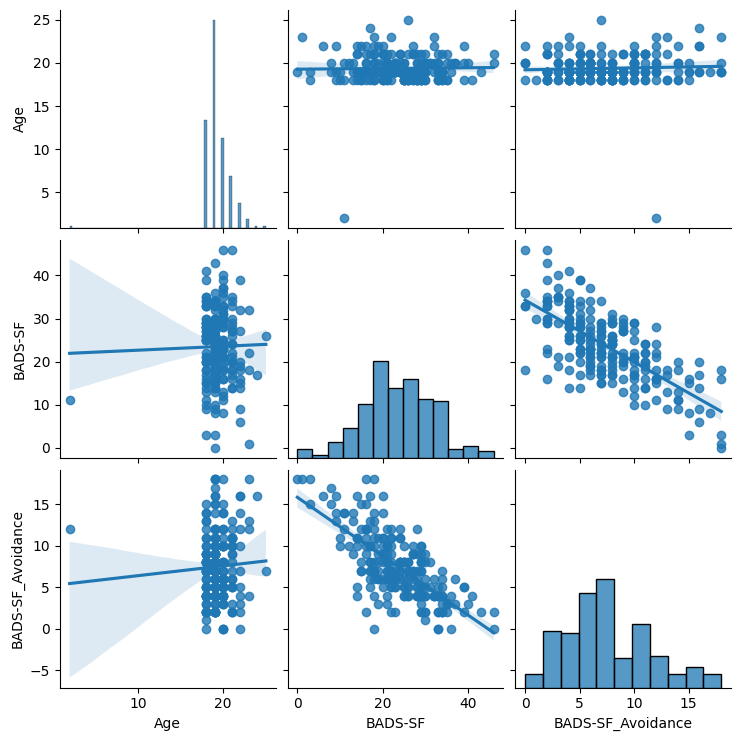

In [31]:
import seaborn as sns
sns.pairplot(dataframe, vars=['Age', 'BADS-SF', 'BADS-SF_Avoidance'], kind='reg')


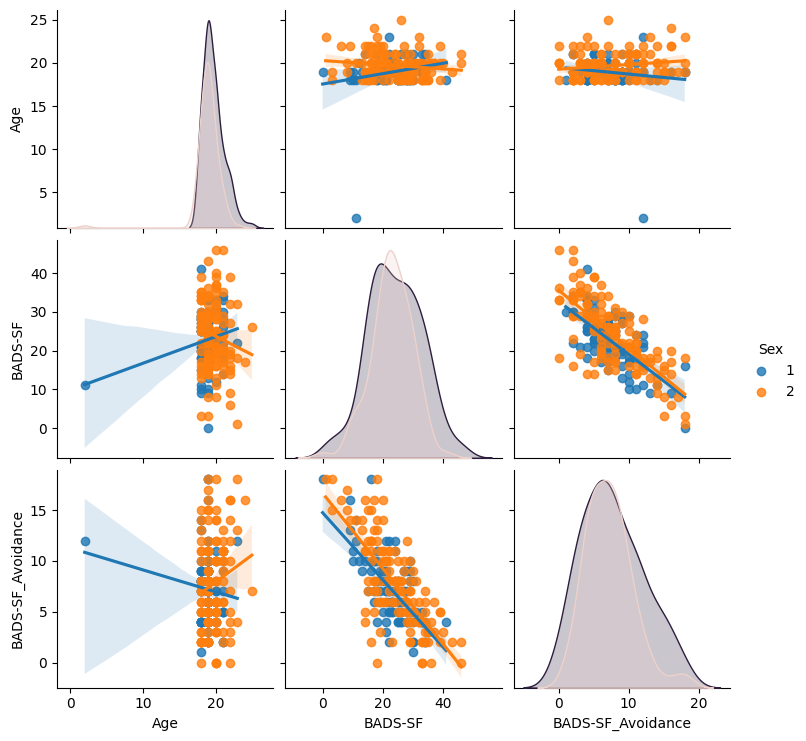

In [32]:
#Las variables categóricas se pueden representar gráficamente como el tono:
sns.pairplot(dataframe, vars=['Age', 'BADS-SF', 'BADS-SF_Avoidance'], hue='Sex', kind='reg')

*Implot: representación gráfica de una regresión invariante*

Una regresión que captura la relación entre una variable y otra utilizando seaborn.Implot()

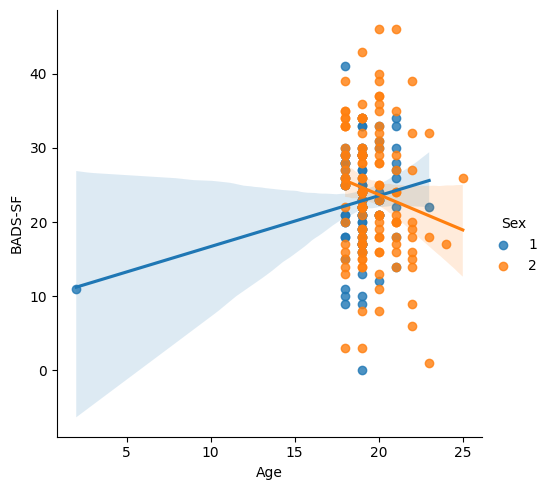

In [34]:
sns.lmplot(x='Age', y='BADS-SF', data=dataframe, hue='Sex', fit_reg=True)

Dado que, en el gráfico anterior, parece haber un par de puntos de datos que están fuera de la nube principal a la derecha, podrían ser valores atípicos, no representativos de la población, pero que impulsan a la regresión.

*Pruebas de iteraciones*

El gráfico anterior está compuesto por dos ajustes diferentes. Necesitamos formular un único modelo que pruebe la variación de la pendiente en las dos poblaciones. Esto se hace a través de una 'iteración'.

In [40]:
import statsmodels.formula.api as sm

result = sm.ols(formula='Sex ~ Age + Sex', data=dataframe).fit()
print(result.summary())
#

                            OLS Regression Results                            
Dep. Variable:                    Sex   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.549e+32
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:06   Log-Likelihood:                 7633.4
No. Observations:                 221   AIC:                        -1.526e+04
Df Residuals:                     218   BIC:                        -1.525e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.331e-16   1.84e-16      1.809      0.0